### Titanic Machine Learning From Disaster


Problem Statement
Use machine learning to create a model that predicts which passengers survived the Titanic shipwreck or not.

### Dataset
1). train.csv:- training dataset, contains all attributes required to make a predictive model along with the outcome attribute i.e. "ground truth".

2). test.csv:- testing dataset, contains all attributes except outcome.

3). gender_submission.csv:- a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

### Attributes Dictionary


PassengerID:- Unique Id's of passenger

Survived:- Target column

1 = Survived

0 = Not Survived.

Pclass: Ticket Class

1 = Upper class

2 = Middle class

3 = Lower class

Name:- Name of passenger.

Sex:- Sex of passenger.

Age:- Age of passenger in years.

Sibsp:- The dataset defines family relations in this way.

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

Parch:- The dataset defines family relations in this way.

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

Ticket:- Ticket number of passenger.

Fare:- Passenger Fare.

Cabin:- Cabin Number.

Embarked:- Port of Embarkation(port on which passenger started journey).

C = Cherbourg

Q = Queenstown

S = Southampton.


In [1]:
# importing the library 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
tit = pd.read_csv("gender_submission.csv")
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
passengerSurvived=train[train.Survived==1]
Id_test=test["PassengerId"]
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
tit.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [8]:
print(tit.info())


print(train.info())


print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
dtypes: int64(2)
memory usage: 6.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non

In [9]:
print("Shape of gender_submission :-",tit.shape)
print("Shape of train :- ", train.shape)
print("shape of test :-",test.shape)

Shape of gender_submission :- (418, 2)
Shape of train :-  (891, 12)
shape of test :- (418, 11)


### Obsevation_1 .


1). Titanic had 2224 passengers and crew .
Our train data has 891 rows (i.e. data of 891 passengers ) and 12 columns ( their information ) and test data has 418 rows and 11 columns.

2). Age, Embarked and Cabin column has null/missing values

In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [12]:
tit.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


In [13]:
# Value count in Target Column.
print(train.Survived.value_counts())

0    549
1    342
Name: Survived, dtype: int64


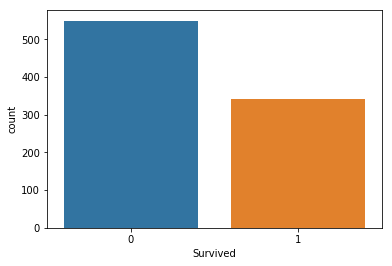

In [14]:
sns.countplot(train["Survived"])

In [15]:
# counting the unique categories in Pclass 
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

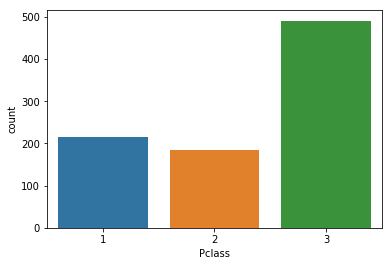

In [16]:
sns.countplot(train["Pclass"])

In [17]:
# percent of people survived in differnt passenger class 
print("Number of Passengers Survived in Pclass => \n",passengerSurvived[["Pclass","Survived"]].groupby("Pclass").count())
print("="*20)
print("Average of Passengers Survived in PClass => \n",train[["Pclass","Survived"]].groupby("Pclass").mean())

Number of Passengers Survived in Pclass => 
         Survived
Pclass          
1            136
2             87
3            119
Average of Passengers Survived in PClass => 
         Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


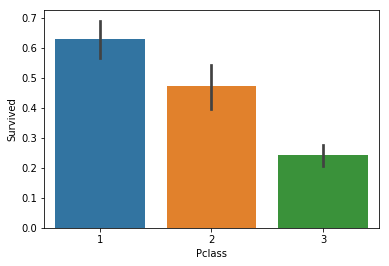

In [18]:
sns.barplot(train["Pclass"],train["Survived"])

In [19]:
# Average fair of passenger class 
train[["Pclass","Fare"]].groupby("Pclass").mean()

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


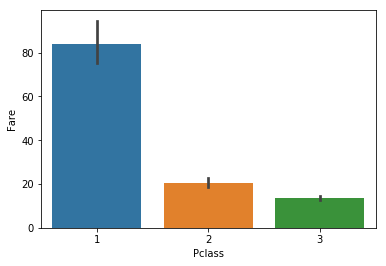

In [22]:
sns.barplot (train["Pclass"],train["Fare"], data = train)

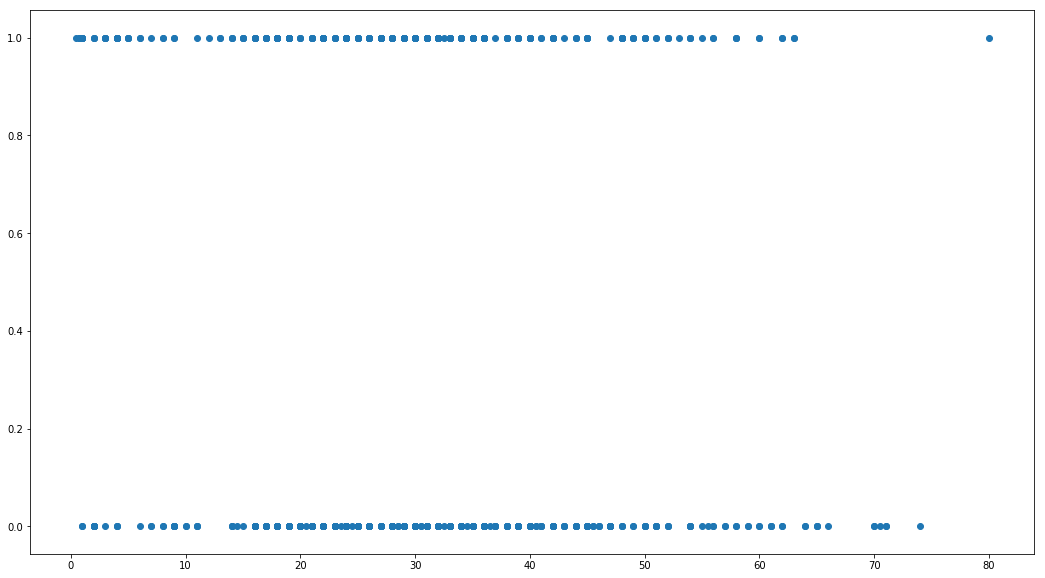

In [23]:
# check the survival of differnt age group 
plt.figure(figsize = [18,10])
plt.scatter (x ="Age", y = "Survived" , data = train )

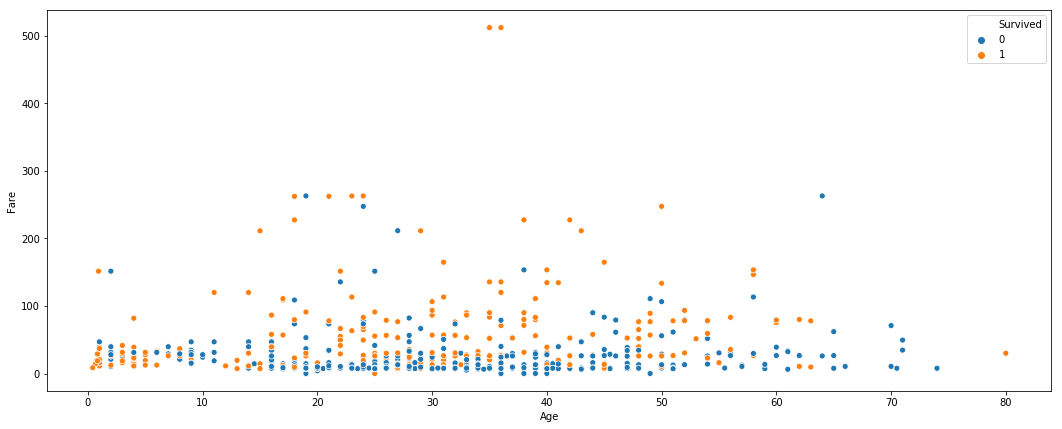

In [30]:
#check the survival of fare 
plt.figure(figsize = [18,7])
sns.scatterplot(x='Age',y='Fare',hue='Survived',data=train)

In [31]:
#count the unique category sibsp
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [32]:
# count the unique category SibSp
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Text(0, 0.5, 'Survived')

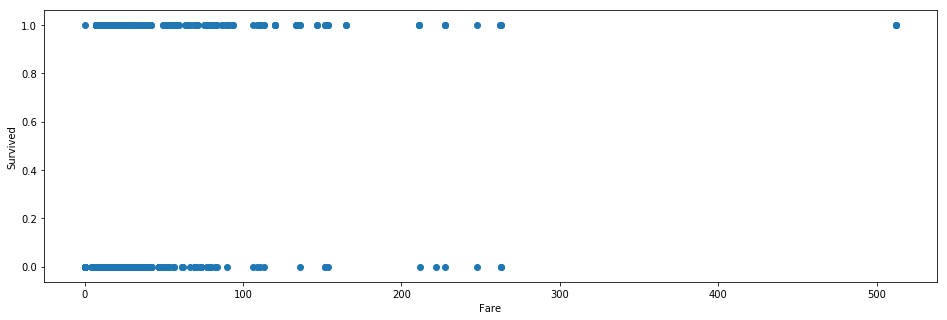

In [38]:
# Survival on basis of Fair..
plt.figure(figsize=[16,5])
plt.scatter(x="Fare",y="Survived",data=train)
plt.xlabel("Fare")
plt.ylabel("Survived")

 ### Observation 2->
1). PassengerId has all unique values -> so it can be removed.

2). The survival rate in our data is 38% which was 32% in titanic tragedy.

3). Most of the people were in 3rd Passenger Class.

4). 63% people survived in Pclass 1, 47% in Pclass 2, 24% in Pclass 3.

5). The average Fare of Pclass 1 is 84, Pclass 2 is 20.6 and Pclass 3 is 13.6.

6). No clear cluster to say which Age group surives the most.

7). The highest aged person was 80 years old.

8). Most of the passengers had no Siblings/Spouse and Parent-Child relation.

9). Hightest Fare was 512.

### Insights ->

1). The Fare of upper and lower class varies too much, thus most number of passengers in 3rd Passenger_class.

In [40]:
# for object datatype feature 
train.describe(include = "O")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Aks, Mrs. Sam (Leah Rosen)",male,1601,B96 B98,S
freq,1,577,7,4,644


In [42]:
#Name column 
train['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [43]:
# sex column 
passengerSurvived.Sex.value_counts()

female    233
male      109
Name: Sex, dtype: int64

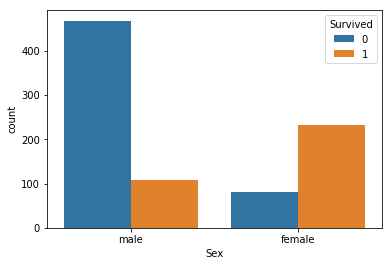

In [44]:
sns.countplot( x = 'Sex', hue = 'Survived', data = train)

In [45]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [46]:
print("Mean Fare of Embarked ports => \n",train[["Embarked","Fare"]].groupby(["Embarked"]).mean())

Mean Fare of Embarked ports => 
                Fare
Embarked           
C         59.954144
Q         13.276030
S         27.079812


In [47]:
print("Mean Survival Rate of Embarked ports => \n",train[["Embarked","Survived"]].groupby(["Embarked"]).mean())


Mean Survival Rate of Embarked ports => 
           Survived
Embarked          
C         0.553571
Q         0.389610
S         0.336957


### Observation _3 -> 
 
1). Name contains all unique values , therefore cannot contribute much too our model thus can be removed. </br>

2). We can extract a new feature from name which contains tittle of name (like - mrs. ,mr. ,dr. , etc.). </br>

3). 577 are men out of 891 (i.e. There were 65 % of men on the ship ), but survival rate of female was more than men. </br>

4). Ticket has large percentage of unique values , therfore can be removed (as contains many unique values). </br>

5). Cabin has lots of missing values , therefore can be removed from our data. </br>

6). There were 3 Embarked ports where S was the most frequent one.


Insights ->

1). As Fare for port C is highest, it can be said that C was the first port in path or most of the passenger in Pclass 1 embarked from port C.

###  Section-2). EDA and Preprocessing of Data ..


## Missing Value Imputation ->
From Observation 1, we are going to impute the missing values in Age and Embarked Column.

## Training data

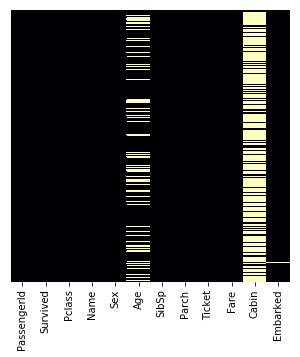

In [48]:
plt.figure(figsize = [5,5])
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='magma')

In [50]:
print("Age =>   /n " , "Number  of missing values =  > ",train.Age.isnull().sum())
print("Percentage of missing values => ",(train.Age.isnull().sum()/891)*100)

Age =>   /n  Number  of missing values =  >  177
Percentage of missing values =>  19.865319865319865


In [53]:
#  As 20% of values are missing, it can be replaced with the mean of Age column.
train.Age.fillna(train.Age.mean(), inplace = True)
train.Age.isnull().all()

False

In [54]:
print("Embarked =>  /n" , "No of missing values => ",train.Embarked.isnull().sum())

Embarked =>  /n No of missing values =>  2


In [55]:
# As of 2 values are missing in Embarked ,they can be replaced by Embarked mode column 
train.Embarked=np.where(train.Embarked.isnull(),train.Embarked.mode(),train.Embarked)
train.Embarked.isnull().all()

False

## Testing data 

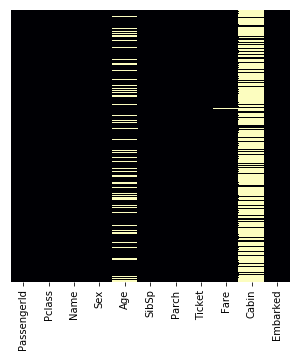

In [60]:
plt.figure(figsize= [5,5])
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='magma')

In [62]:
print("Age =>  /n ","Number of missing value  => ",test.Age.isnull().sum)
print(" Percentage of missing values => ",(test.Age.isnull().sum()/891)*100)


Age =>  /n  Number of missing value  =>  <bound method Series.sum of 0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10      True
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22      True
23     False
24     False
25     False
26     False
27     False
28     False
29      True
       ...  
388    False
389    False
390    False
391    False
392    False
393    False
394    False
395    False
396    False
397    False
398    False
399    False
400    False
401    False
402    False
403    False
404    False
405    False
406    False
407    False
408     True
409    False
410     True
411    False
412    False
413     True
414    False
415    False
416     True
417     True
Name: Age, Length: 418, dtype: bool>
 Percentage of missing values =>  9.652076318742985


In [63]:
test.Age.fillna(test.Age.mean(), inplace = True )
test.Age.isnull().all()

False

In [64]:
print("Fare =>   /n" , "Number of missing value ", test.Fare.isnull().sum())


Fare =>   /n Number of missing value  1


In [65]:
test.Fare.fillna(test.Fare.mean(), inplace = True)
test.Fare.isnull().all()

False

### Removing insignificant features  ->

From observation 2 and 3, Ticket and Cabin column can be removed.

In [73]:
train_new = train.drop(["PassengerId" , "Cabin", "Ticket"] ,axis = 1)
train_new.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [77]:
test_new = test.drop(["PassengerId" , "Cabin" , "Ticket"] ,axis = 1)
test_new.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

 ## Encoding the Categorical Features
 
 As observed from above Sex column has 2 categories and Embarked Column has 3

### Training data....

In [78]:
train.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [87]:
# encode Sex column
train_new["Sex"]=np.where(train_new["Sex"]=="male",1,0)


In [88]:
train_new.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,2
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,1
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,1


In [89]:
train_new.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
886,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,13.00,1
887,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,30.00,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,23.45,1
889,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,30.00,2
890,0,3,"Dooley, Mr. Patrick",0,32.000000,0,0,7.75,3


In [90]:
# Testing data 

In [93]:
test_new["Sex"]=np.where(test_new["Sex"]=="male",1,0)
# encode Embarked column
test_new["Embarked"]=test_new["Embarked"].replace({"S":1,"C":2,"Q":3})


In [94]:
test_new.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,3
1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,1
2,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,3
3,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,1


## Feature Extraction ->

As mentioned in Observation_3, we can extract new feature from name column

## Training data 

In [95]:
train_new["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

In [96]:
ls=[]
for row in train_new.Name:
    start_index=row.find(", ")
    end_index=row.find(".")
    ls.append(row[start_index+1:end_index])
print("length of list => ",len(ls))
print("\nList =>\n",ls[:35])

length of list =>  891

List =>
 [' Mr', ' Mrs', ' Miss', ' Mrs', ' Mr', ' Mr', ' Mr', ' Master', ' Mrs', ' Mrs', ' Miss', ' Miss', ' Mr', ' Mr', ' Miss', ' Mrs', ' Master', ' Mr', ' Mrs', ' Mrs', ' Mr', ' Mr', ' Miss', ' Mr', ' Miss', ' Mrs', ' Mr', ' Mr', ' Miss', ' Mr', ' Don', ' Mrs', ' Miss', ' Mr', ' Mr']


In [97]:
train_new['NameTitle'] = pd.Series(ls)
train_new.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,NameTitle
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,1,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,2,Mrs
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,1,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,1,Mrs
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,1,Mr


In [98]:
# Concating Name Titles having less value count to a single category..
train_new['NameTitle'] = train_new['NameTitle'].replace([' Dr',' Rev',' Mlle', ' Col', ' Major',
                                       ' Sir',' Ms', ' the Countess',' Lady',' Mme', ' Jonkheer',' Capt',' Don'],' Other')

In [99]:
train_new.NameTitle.unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Other'], dtype=object)

In [100]:
train_new.NameTitle.value_counts()

 Mr        517
 Miss      182
 Mrs       125
 Master     40
 Other      27
Name: NameTitle, dtype: int64

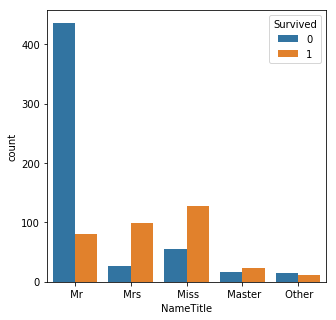

In [101]:
plt.figure(figsize=(5,5))
sns.countplot(x="NameTitle",hue="Survived",data=train_new)

In [102]:
# Survival Rate of each category..
train_new[["NameTitle","Survived"]].groupby("NameTitle").mean()

,Survived
NameTitle,
Master,0.575000
Miss,0.697802
Mr,0.156673
Mrs,0.792000
Other,0.444444


### Observation ->
This confirm the fact that female survived the most, as Miss has highest survival rate.

In [103]:
# Convert Catergorical to Numerical datatype..
train_new["NameTitle"].replace({" Mr":1," Miss":2," Mrs":3," Master":4," Other":5},inplace=True)
train_new.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,NameTitle
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,1,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,2,3
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,1,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,1,3
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,1,1


In [104]:
# Removing Name column from datafrane..
train_df=train_new.drop(["Name"],axis=1)
print("# Dimensions Of Data => ",train_df.shape)
train_df.head()

# Dimensions Of Data =>  (891, 9)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NameTitle
0,0,3,0,22.0,1,0,7.2500,1,1
1,1,1,0,38.0,1,0,71.2833,2,3
2,1,3,0,26.0,0,0,7.9250,1,2
3,1,1,0,35.0,1,0,53.1000,1,3
4,0,3,0,35.0,0,0,8.0500,1,1


### Testing Data...
Coverting for test aswell, for fitting it into our model

In [106]:
ls=[]
for row in test_new.Name:
    start_index=row.find(", ")
    end_index=row.find(".")
    ls.append(row[start_index+1:end_index])
print("length of list => ",len(ls))
print("\nList =>\n",ls)

length of list =>  418

List =>
 [' Mr', ' Mrs', ' Mr', ' Mr', ' Mrs', ' Mr', ' Miss', ' Mr', ' Mrs', ' Mr', ' Mr', ' Mr', ' Mrs', ' Mr', ' Mrs', ' Mrs', ' Mr', ' Mr', ' Miss', ' Mrs', ' Mr', ' Master', ' Mrs', ' Mr', ' Mrs', ' Mr', ' Miss', ' Mr', ' Mr', ' Mr', ' Mr', ' Mr', ' Mrs', ' Mrs', ' Mr', ' Mr', ' Miss', ' Miss', ' Mr', ' Mr', ' Mr', ' Mr', ' Mr', ' Mrs', ' Mrs', ' Mr', ' Mr', ' Mr', ' Mrs', ' Mrs', ' Mr', ' Mr', ' Miss', ' Miss', ' Mr', ' Master', ' Mr', ' Mr', ' Mr', ' Miss', ' Mr', ' Mr', ' Mr', ' Miss', ' Master', ' Mrs', ' Miss', ' Mr', ' Mr', ' Mrs', ' Miss', ' Mr', ' Miss', ' Mr', ' Miss', ' Mr', ' Mr', ' Mrs', ' Mr', ' Miss', ' Master', ' Mr', ' Mr', ' Mr', ' Mr', ' Mr', ' Miss', ' Miss', ' Ms', ' Master', ' Mrs', ' Mr', ' Mrs', ' Mr', ' Mr', ' Mr', ' Mrs', ' Mr', ' Miss', ' Mr', ' Mrs', ' Mr', ' Mr', ' Mr', ' Mrs', ' Mr', ' Mr', ' Mr', ' Mr', ' Mr', ' Mr', ' Miss', ' Miss', ' Miss', ' Mrs', ' Mr', ' Mr', ' Miss', ' Mr', ' Mrs', ' Miss', ' Mr', ' Mrs', ' Mr', ' Mr', '

In [107]:
test_new['NameTitle'] = pd.Series(ls)
# Concating Name Titles having less value count to a single category..
test_new['NameTitle'] = test_new['NameTitle'].replace([' Dr',' Rev',' Mlle', ' Col', ' Major',
                                       ' Sir',' Ms', ' the Countess',' Lady',' Mme', ' Jonkheer',' Capt',' Don',' Dona'],' Other')

In [108]:
# Dropping Name Column..
test_new.drop(["Name"],axis=1,inplace=True)
# Convert Catergorical to Numerical datatype..
test_new["NameTitle"].replace({" Mr":1," Miss":2," Mrs":3," Master":4," Other":5},inplace=True)
test_new.NameTitle.value_counts()

1    240
2     78
3     72
4     21
5      7
Name: NameTitle, dtype: int64

### Check Data Distribution Of Each Feature

C:\Users\LOKESH MUNDRA\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\LOKESH MUNDRA\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


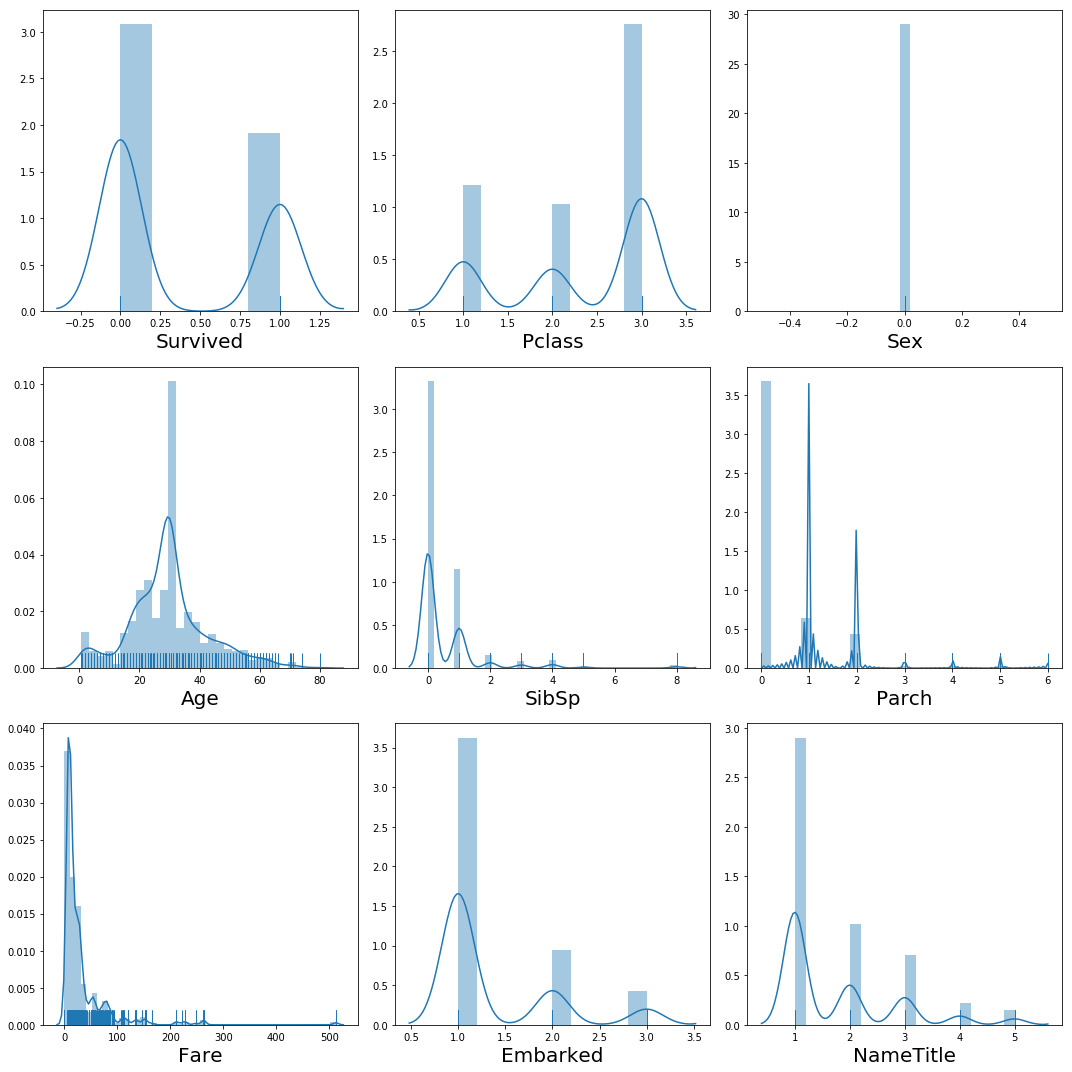

In [109]:
# let's see how data is distributed for every column
from scipy.stats import norm
plt.figure(figsize=(15,15), facecolor='white')
plotnumber = 1

for column in train_df: 
    if plotnumber<=len(train_df.columns):
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(train_df[column],rug=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [110]:
# Age column..
print("Passengers with age less than 1 => ")
train_df[train_df.Age<1]

Passengers with age less than 1 => 


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NameTitle
78,1,2,0,0.83,0,2,29.0000,1,4
305,1,1,0,0.92,1,2,151.5500,1,4
469,1,3,0,0.75,2,1,19.2583,2,2
644,1,3,0,0.75,2,1,19.2583,2,2
755,1,2,0,0.67,1,1,14.5000,1,4
803,1,3,0,0.42,0,1,8.5167,2,4
831,1,2,0,0.83,1,1,18.7500,1,4


In [114]:
# if Age is less than 1 like 0.24 -> make it one, if not less than 1 => round off..
for index,value in enumerate(train_new.Age):
    if value<1:
        train_new.Age[index]=1      
    else:
        train_new.Age[index]=round(value)

# Change datatype float to int..
train_new.Age=train_new.Age.astype('int64')

C:\Users\LOKESH MUNDRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [ ]:
print("Passengers with age less than 1 => ",len(train_new[train_new.Age<1])

In [ ]:
# Fare Column..
print("Number of Passenger with Zero Fare => ",len(train_new[train_new.Fare==0]))

In [115]:
# As these are only 15 we can replace these with mean Fare..
train_df.Fare.replace(0,train_df.Fare.mean(),inplace=True)
print("Number of Passenger with Zero Fare => ",len(train_df[train_df.Fare==0]))

print("Passengers with age less than 1 => ",len(train_df[train_df.Age<1]))

Number of Passenger with Zero Fare =>  0
Passengers with age less than 1 =>  0


## Removing Skewness in Test Data

In [117]:
test_new['Age']=np.log(test_new['Age'])
test_new['Fare']=np.log(test_new['Fare']+1)

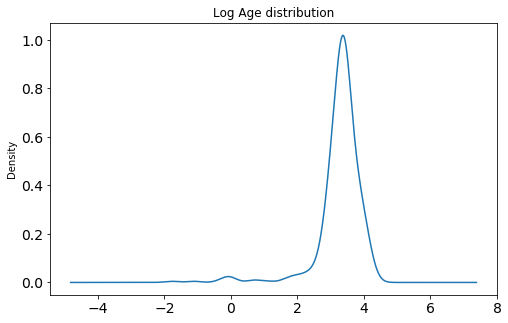

In [119]:
(test_new['Age']).plot(kind = 'density', title = 'Log Age distribution', fontsize=14, figsize=(8, 5))

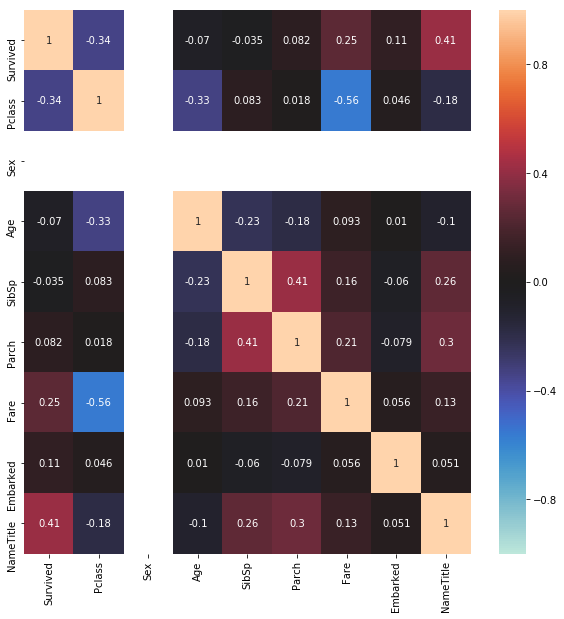

In [120]:
# correlation checking 
plt.figure(figsize=(10,10))
sns.heatmap(train_df.corr(),annot=True,vmin=-1, vmax=1, center= 0)

####  As per the correlation heatmap -> SibSp and Parch are low correlated, this basically means if someone has child onboard, may have spouce onboard too, or if sibling then may have parent too.
=> In overall low correlation (less than 0.5) is seen in some features but we can negelect it.

In [121]:
# Shifting target column at last ..
survived_col=train_new.pop("Survived")
train_new["Survived"]=survived_col 
train_new.head(3)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,NameTitle,Survived
0,3,"Braund, Mr. Owen Harris",0,22,1,0,7.2500,1,1,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,71.2833,2,3,1
2,3,"Heikkinen, Miss. Laina",0,26,0,0,7.9250,1,2,1


### Split the features and Target column

In [122]:
X = train_new.drop(['Survived'],axis=True)
y = train_new['Survived']

### Standardization 


In [128]:
X

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,NameTitle
0,3,"Braund, Mr. Owen Harris",0,22,1,0,7.2500,1,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,71.2833,2,3
2,3,"Heikkinen, Miss. Laina",0,26,0,0,7.9250,1,2
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,53.1000,1,3
4,3,"Allen, Mr. William Henry",0,35,0,0,8.0500,1,1
5,3,"Moran, Mr. James",0,30,0,0,8.4583,3,1
6,1,"McCarthy, Mr. Timothy J",0,54,0,0,51.8625,1,1
7,3,"Palsson, Master. Gosta Leonard",0,2,3,1,21.0750,1,4
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27,0,2,11.1333,1,3
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14,1,0,30.0708,2,3
